<center>
    <h1>Самостоятельная практика по классификации (ОТВЕТЫ)</h1>
<h2>Удовлетворенность пассажиров авиакомпании</h2><img src='./data/plane.png'/>
</center>

# Постановка задачи
У нас есть данные опросников об удовлетворенности пассавжиров перелётом некоторой авикомпании.<br>
В конце опросника респонденты подводили итог: удовлетворены ли они предоставленными услугами и перелетом, оценивают ли нейтрально или негативно.<br>
Для простоты классификации "нейтральный" и "негативный" классы клиентов были объединены.<br>

Необходимо построить бинарный классификатор и найти потенциальные точки роста.

## Данные
**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

## План
Так как нам уже данные данные для трейна и теста отдельно, то мы будем работать только с выборкой для обучения, а в тест посмотрим только в самом конце.
<br>
1. Закодировать категориальные признаки;
2. Проверить признаки на мультиколлинеарность;
3. Провести EDA (сделаем тяп-ляп);
4. Обучить различные модели для классификации, затюнить гиперпараметры;
5. Отобрать лучшую модель, оценить качество предсказаний на тестовой выборке.

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# 1. EDA и препроцессинг
## 1.1 
Прочитайте данные для обучения в отедльный датафрейм

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## 1.2 
* Определите категориальные столбцы;
* Подумайте, есть ли среди них порядковые;
* Закодируйте категориальные столбцы с помощью one-hot encoding (`pd.get_dummies` или `OneHotEncoder` из `sklearn`) (не забудьте про мультиколлинеарность).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
df.select_dtypes(exclude='number')

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0


## 1.3
* Определите числовые колонки;
* Отберите числовые колонки в отдельный датафрейм<br>
(позже мы соединим датафрейм с закодированными категориальными колонками и этот числовой датафрейм);
* Оставьте только те столбцы, которые будете использовать для обучения.

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0


# 2.

## 2.1
* Сконкатенируйте категориальный и числовой датафреймы;
* Посчитайте матрицу линейных корреляций (`df.corr()`) столбцов друг с другом.<br>
Укажите в явном виде метод для подсчета коэффициентов корреляции "pearson", а минимальное число общих наблюдений для стольцов -- 10 тысяч;<br>
* Отрисуйте хитмап для матрицы коррялеций<br>
Так как коэф.корреляции измеряется от -1 до 1, то для правильной раскраски клеток укажите vmin=-1, vmax=1, center=0;<br>
По желанию добавьте аннотацию клеток, чтобы были подписаны значения (получится некрасиво);<br>
По желанию поменяйте палитру (cmap) для раскраски.

(103904, 23)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
Gender_Male,1.000000,-0.031732,0.006909,-0.005295,-0.010351
Customer Type_disloyal Customer,-0.031732,1.000000,-0.308333,0.118694,-0.062967
Type of Travel_Personal Travel,0.006909,-0.308333,1.000000,0.500938,0.102775
Class_Eco,-0.005295,0.118694,0.500938,1.000000,-0.252128
Class_Eco Plus,-0.010351,-0.062967,0.102775,-0.252128,1.000000


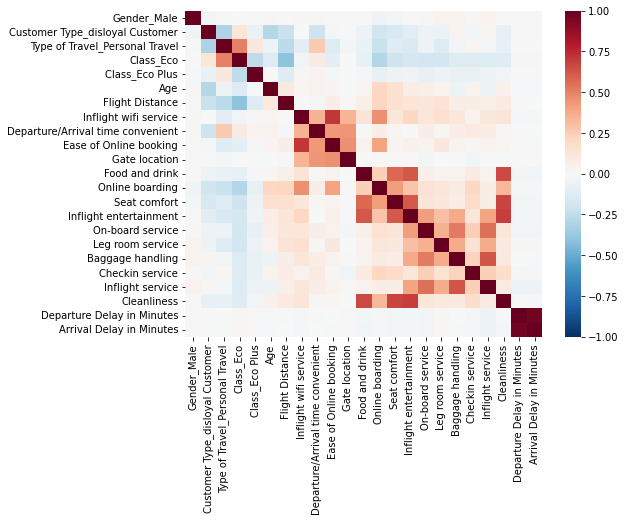

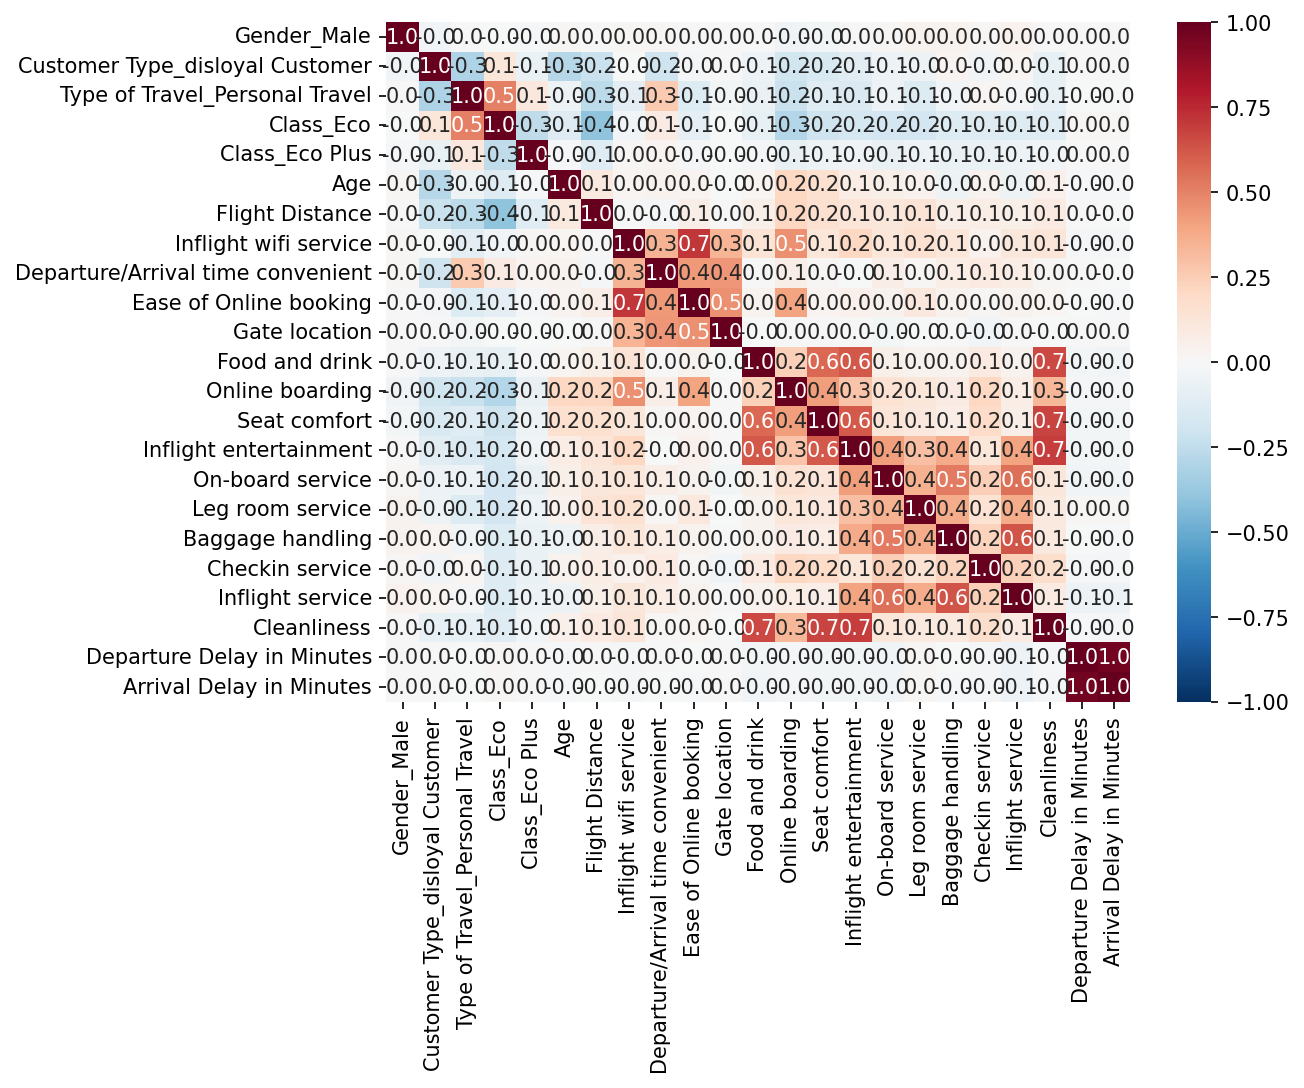

## 2.2
* Получите список столбцов, которые коррелируются хотя бы с одним столбцом по модулю больше, чем на 0.4;
* Для этих стольцов получите матрицу корреляций (или отфильтруйте нужные столбы и строки из полученной в пункте 2.1) и отрисуйте её с аннотацией клеток.

Gender_Male                          False
Customer Type_disloyal Customer      False
Type of Travel_Personal Travel        True
Class_Eco                             True
Class_Eco Plus                       False
Age                                  False
Flight Distance                      False
Inflight wifi service                 True
Departure/Arrival time convenient     True
Ease of Online booking                True
Gate location                         True
Food and drink                        True
Online boarding                       True
Seat comfort                          True
Inflight entertainment                True
On-board service                      True
Leg room service                     False
Baggage handling                      True
Checkin service                      False
Inflight service                      True
Cleanliness                           True
Departure Delay in Minutes            True
Arrival Delay in Minutes              True
dtype: bool

Index(['Type of Travel_Personal Travel', 'Class_Eco', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Baggage handling',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

,Type of Travel_Personal Travel,Class_Eco,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking
Type of Travel_Personal Travel,1.000000,0.500938,-0.105085,0.259763,-0.133511
Class_Eco,0.500938,1.000000,-0.037197,0.082321,-0.098039
Inflight wifi service,-0.105085,-0.037197,1.000000,0.343845,0.715856
Departure/Arrival time convenient,0.259763,0.082321,0.343845,1.000000,0.436961
Ease of Online booking,-0.133511,-0.098039,0.715856,0.436961,1.000000


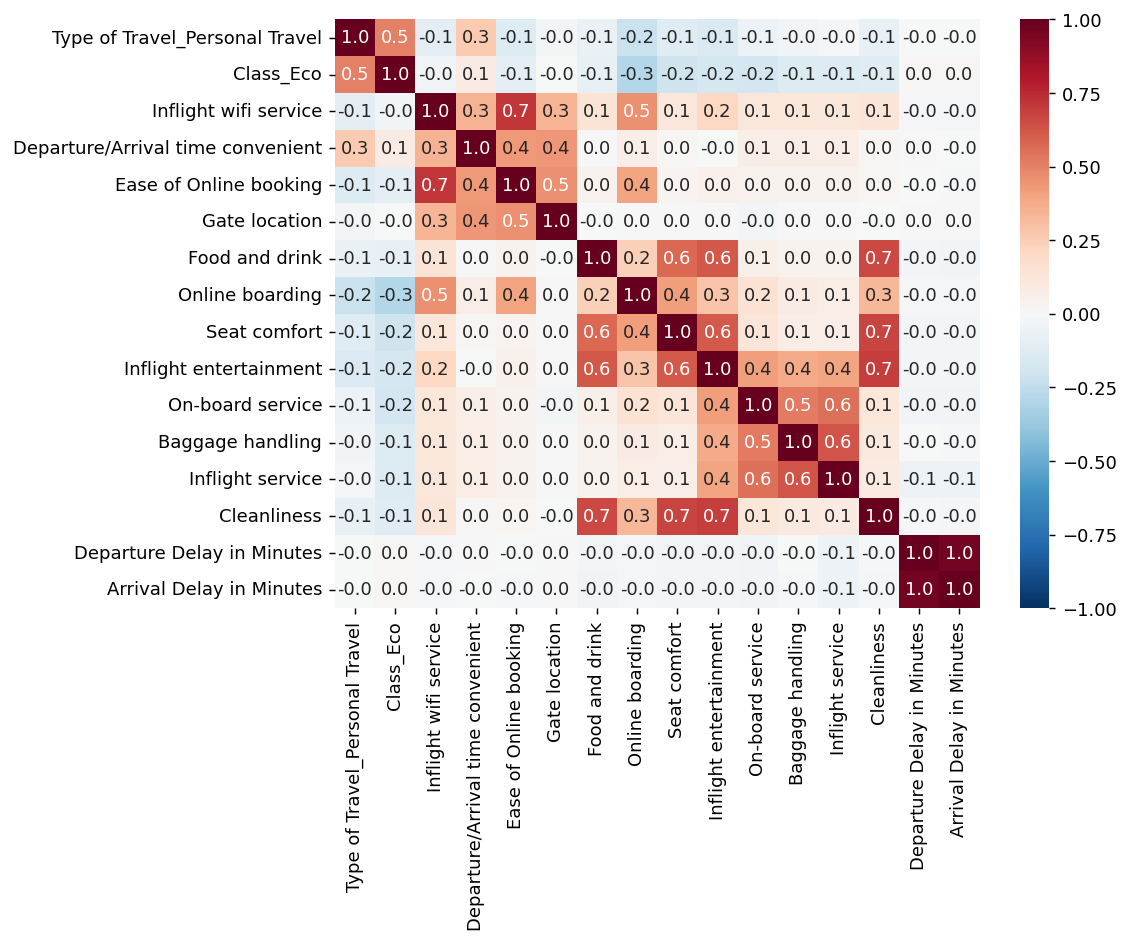

Замечания:
1. Видим, что опоздание вылета и прилета силньо скоррелированы (около 1). Это логично. Но и опасно для модели. Оставим для уверенности только один столбец.
2. Мы не использовали таргет для подсчета корреляций, а стоило.

## 2.3
* В датафрейме с числовыми признаками проверьте наличие пропусков;
* Заполните пропуским средним значениям для столбца.

Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
dtype: int64

Arrival Delay in Minutes


Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# 3.
## 3.1
* Отберите столбец с целевой переменной;
* Закодируйте его (1 -- satisfied, 0 - neutral or dissatisfied).

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

## 3.2
Мы сделаем достаточной простой препроцессинг без создания пайплайнов. На самом деле в sklearn есть пайпланы и <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html">ColumnTransformer</a>, позволяющий выполнять разные трансформации для колонок. То есть мы могли бы с помощью sklearn делать one-hot encoding для одних колонок, Standard scaling для других. Собрать это в пайплайн, запустить GridSearchCV.<br>
Чтобы в этом разобраться, нужно время, но в итоге такое решение будет эффективнее (его предлагается написать в конце ноутбука. Пока сделаем вариант попроще).

* Импортируйте модель логистической регрессии;
* Импортируйте <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">StratifiedKFold</a>;
* Импортируйте метрику f1_score;
* Создтайте экземпляр StratifiedKFold, 5 фолдов, перемешивать данные. random_state=42.

## 3.3
* Создайте экземпляр логистической регрессии (можете указать max_iter=10000 для лучшей сходимости решения);
* Создайте экземпляр для стандартизации числовых признаков;
* Создайте список для хранения метрик;
* Проитерируйте наши данные с помощью StratifiedKFold.<br>
Сейчас у нас есть датафрейм с закодированными категориями, датафрейм с числовыми признаками, таргет. То есть 3 переменные.<br>
Экземпляр StratifiedKFold ожидает только 2 переменные: матрицу признаков и таргет. Так как на каждой итерации цикла нам даются лишь номера строк,<br>
мы можем просто дать датафрейм с категориальными признаками и таргет. Или датафрейм с числовыми признаками и таргет. А уже в цикле использовать оба датафрейма с признаками.<br>
* **Шкалируйте только числовые признаки, а затем соединяйте числовые с категориальными и учите модель, делайте предикт, считайте f1 метрику.**

*Эта котовасия с признаками всё еще есть, так как хочется шкалировать только числовые признаки, а категориальные не хочется шкалировать. Смысл этого будет лучше ясен позже, когда мы будем оценивать важность признаков.

In [24]:
from sklearn import set_config
# чтобы скейлер и другие трансформеры возращали не матрицу, а датафрейм
set_config(transform_output = "pandas")

[0.8549757627601938,
 0.8496495591227673,
 0.8555962785452494,
 0.8546061188712324,
 0.8508607465484915]

0.8531376931695869

## 3.4
* Сделайте то же самое, но **стандартизируйте** (шкалируйте) **данные после конкатенации категориальных и числовых признаков**.

[0.8548129562043795,
 0.8493413986093052,
 0.8557096156013978,
 0.8547356516822165,
 0.8508463023969102]

0.8530891848988418

## 3.5
* Проделайте те же шаги, но для модели к-ближайших соседей;
* Проитерируйтесь по числу соседей от 3 до 50 (c 3 до 20 шаг 1, потом шаг 2, т.е. 20, 22, 24 и тд);
* **Шкалируйте только числовые признаки, потом конкатенируйте с категориальными;**
* Определите средний f1_score для лучшего числа соседей.

*Так как решение уже требует времени, то для монитонинга можно использовать библиотеку tqdm. Она позволяет отслеживать номер итерации (в том числе и номер итерации вложенного цикла при желании).<br>
*Я приведу более топорный пример с мониторингом номера итерации, чтобы не пришлось устанавливать дополнительные библиотеки.

In [30]:
# !conda install -c conda-forge tqdm

In [31]:
# from tqdm.notebook import tqdm

Лучшее число соседей 5


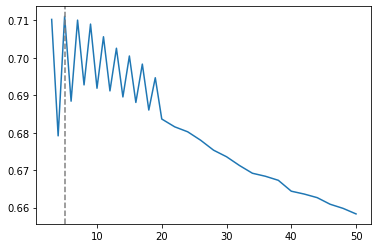

0.7111243479810941

## 3.6
* Проделайте те же шаги, но для модели к-ближайших соседей;
* Проитерируйтесь по числу соседей от 3 до 50 (c 3 до 20 шаг 1, потом шаг 2, т.е. 20, 22, 24 и тд);
* Сначала конкатенируйте числовые и категориальные признаки, **а потом шкалируйте**;
* Определите средний f1_score для лучшего числа соседей.

7


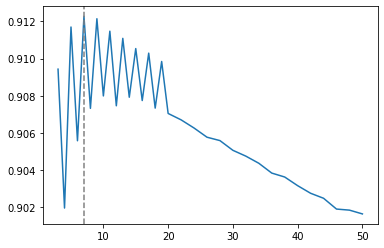

0.9122760975502946

# Итого

Почему же получилось, что сначала f1 для KNN модели была 0.71, а потом 0.91?<br>
Если шкалировать числовые признаки, то значения там измеряются уже в стандартных отклонениях. Одно стандартное отклонение (т.е. значение +1 или -1) -- это уже достаточно много. Категориальные признаки, которые мы добавляли, закодированы с помощью one-hot, то есть там нолики и единички. в итоге единичка в категории вносила такой же вклад в расстояние, как и числовой признак, отличающийся от среднего на 1 стд. Это оказалось неоптимально, поэтому вариант со шкалированием после конкатенации признаков (то есть шкалирование и числовых, и категориальных) оказался лучше в итоге, так как расстояния теперь считаются "честнее".<br>

При этом на лог.регрессию шкалирование до или после конкатенации (и шкалирование вообще) не особо влияет на предсказательный результат.<br>

Что делать дальше? Оценивать лучшую модель на тестовой выборке.